In [311]:
# Modules we'll use
import pandas as pd
import numpy as np


# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# For Box-Cox Normalization
from scipy import stats

# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [90]:
# Read in all our data
Nobel_df = pd.read_csv("Data/archive.csv")

# Set seed for reproducibility
np.random.seed(0)

In [91]:
# Checking and cleaning the dataset.

Nobel_Missing = Nobel_df.isnull().sum()


print(Nobel_Missing)




Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [92]:
total_cells_nobel = np.product(Nobel_df.shape) 
total_missing_nobel = Nobel_Missing.sum()

# percent of data that is missing
percentage_missing_values = (total_missing_nobel/total_cells_nobel) * 100
print(percentage_missing_values)

11.672973282880404


### Percentage of missing data in each column



In [18]:
sum_of_rows= Nobel_df.count()
print(sum_of_rows)

Year                    969
Category                969
Prize                   969
Motivation              881
Prize Share             969
Laureate ID             969
Laureate Type           969
Full Name               969
Birth Date              940
Birth City              941
Birth Country           943
Sex                     943
Organization Name       722
Organization City       716
Organization Country    716
Death Date              617
Death City              599
Death Country           605
dtype: int64


#### Since the first 3 columns had 0 missing values, then we can take the value of their count as the actual count of data entries

In [36]:
year_missing_percentage= (0/969)*100
category_missing_percentage= (0/969)*100
prize_missing_percentage= (0/969)*100
motivation_missing_percentage= (88/969)*100
Prize_Share_missing_percentage= (0/969)*100
Laureate_ID_missing_percentage= (0/969)*100
Laureate_Type_missing_percentage= (0/969)*100
Full_Name_missing_percentage= (0/969)*100
Birth_Date_missing_percentage=(29/969)*100
Birth_City_missing_percentage=(28/969)*100
Birth_Country_missing_percentage=(26/969)*100
Sex_missing_percentage=(26/969)*100
Organization_Name_missing_percentage=(247/969)*100     
Organization_City_missing_percentage=(253/969)*100    
Organization_Country_missing_percentage=(253/969) *100
Death_Date_missing_percentage =(352/969)*100          
Death_City_missing_percentage=(370/969)*100           
Death_Country_missing_percentage=(364/969) *100        

    
    
print("year_percentage", year_percentage)
print("category_missing_percentage",category_missing_percentage )
print("prize_missing_percentage", prize_missing_percentage)
print("motivation_missing_percentage", motivation_missing_percentage)
print("Prize_Share_missing_percentage",Prize_Share_missing_percentage )
print("Laureate_ID_missing_percentage",Laureate_ID_missing_percentage )
print("Laureate_Type_missing_percentage",Laureate_Type_missing_percentage )
print("Full_Name_missing_percentage",Full_Name_missing_percentage )
print("Birth_Date_missing_percentage",Birth_Date_missing_percentage )
print("Birth_City_missing_percentage",Birth_City_missing_percentage )
print("Birth_Country_missing_percentage",Birth_Country_missing_percentage )
print("Sex_missing_percentage",Sex_missing_percentage )
print("Organization_Name_missing_percentage",Organization_Name_missing_percentage )
print("Organization_Country_missing_percentage",Organization_Country_missing_percentage )
print("Death_Date_missing_percentage", Death_Date_missing_percentage)
print("Death_City_missing_percentage",Death_City_missing_percentage )
print("Death_Country_missing_percentage",Death_Country_missing_percentage )





year_percentage 0.0
category_missing_percentage 0.0
prize_missing_percentage 0.0
motivation_missing_percentage 9.081527347781218
Prize_Share_missing_percentage 0.0
Laureate_ID_missing_percentage 0.0
Laureate_Type_missing_percentage 0.0
Full_Name_missing_percentage 0.0
Birth_Date_missing_percentage 2.9927760577915374
Birth_City_missing_percentage 2.8895768833849327
Birth_Country_missing_percentage 2.683178534571723
Sex_missing_percentage 2.683178534571723
Organization_Name_missing_percentage 25.49019607843137
Organization_Country_missing_percentage 26.109391124871
Death_Date_missing_percentage 36.326109391124874
Death_City_missing_percentage 38.18369453044376
Death_Country_missing_percentage 37.56449948400412


In [125]:
Motivation_series = pd.isnull(Nobel_df["Motivation"])  
    

Nobel_df[Motivation_series] 

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria
35,1906,Peace,The Nobel Peace Prize 1906,NaN,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,NaN,NaN,NaN,1919-01-06,"Oyster Bay, NY",United States of America
40,1907,Peace,The Nobel Peace Prize 1907,NaN,1/2,471,Individual,Ernesto Teodoro Moneta,1833-09-20,Milan,Austrian Empire (Italy),Male,NaN,NaN,NaN,1918-02-10,Milan,Italy
41,1907,Peace,The Nobel Peace Prize 1907,NaN,1/2,472,Individual,Louis Renault,1843-05-21,Autun,France,Male,Sorbonne University,Paris,France,1918-02-08,Barbizon,France


### As we can see, all missing records for for the motivation column are from the category of "Peace", which suggests that there might be something wrong with the data collection with this specific category of the nobel prize.


### After checking the official Noble Prize website, from which the motivations were collected, it was found the motivation to award the prize was missing on the website since the start of the prize till 1986

### Checking for blank organization countries

In [100]:

Missing_Organization_Country = pd.isnull(Nobel_df["Organization Country"])  
    

No_Organization_Country=Nobel_df[Missing_Organization_Country] 
No_Organization_Country

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN,1910-04-26,Paris,France
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN,1914-03-25,Maillane,France


In [126]:
No_Organization_Country_df = pd.DataFrame(No_Organization_Country)

### Finding records that have missing organization country and have an organization name

In [142]:
Missing_Organization_Name = pd.notnull(No_Organization_Country_df["Organization Name"])  
    

No_Organization_Name =No_Organization_Country_df[Missing_Organization_Name]
No_Organization_Name_df = pd.DataFrame(No_Organization_Name)
display(No_Organization_Name_df)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
143,1928,Medicine,The Nobel Prize in Physiology or Medicine 1928,"""for his work on typhus""",1/1,318,Individual,Charles Jules Henri Nicolle,1866-09-21,Rouen,France,Male,Institut Pasteur,Tunis,NaN,1936-02-28,Tunis,Tunisia
602,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,270,Individual,Johann Deisenhofer,1943-09-30,Zusamaltheim,Germany,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
727,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
775,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,770,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
830,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
842,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,831,Individual,Roger Y. Tsien,1952-02-01,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,2016-08-24,"Eugene, OR",United States of America
855,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,842,Individual,Thomas A. Steitz,1940-08-23,"Milwaukee, WI",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
865,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
899,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
924,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,885,Individual,Randy W. Schekman,1948-12-30,"St. Paul, MN",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN


In [146]:
USA=No_Organization_Name_df.loc[No_Organization_Name['Organization Name'].isin(['Howard Hughes Medical Institute'])]
USA_df = pd.DataFrame(USA)
USA_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
602,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,270,Individual,Johann Deisenhofer,1943-09-30,Zusamaltheim,Germany,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
727,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
775,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,770,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
830,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
842,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,831,Individual,Roger Y. Tsien,1952-02-01,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,2016-08-24,"Eugene, OR",United States of America
855,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,842,Individual,Thomas A. Steitz,1940-08-23,"Milwaukee, WI",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
865,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
899,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
924,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,885,Individual,Randy W. Schekman,1948-12-30,"St. Paul, MN",United States of America,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN
926,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,886,Individual,Thomas C. Südhof,1955-12-22,Göttingen,Germany,Male,Howard Hughes Medical Institute,NaN,NaN,NaN,NaN,NaN


### Adding United States of America

In [137]:
france=No_Organization_Name_df.loc[No_Organization_Name['Organization Name'].isin(['Institut Pasteur'])]
france_df = pd.DataFrame(france)
france_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
143,1928,Medicine,The Nobel Prize in Physiology or Medicine 1928,"""for his work on typhus""",1/1,318,Individual,Charles Jules Henri Nicolle,1866-09-21,Rouen,France,Male,Institut Pasteur,Tunis,NaN,1936-02-28,Tunis,Tunisia


### Adding France

In [140]:
france_df["Organization Country"].fillna("France", inplace = True) 
display(france_df)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
143,1928,Medicine,The Nobel Prize in Physiology or Medicine 1928,"""for his work on typhus""",1/1,318,Individual,Charles Jules Henri Nicolle,1866-09-21,Rouen,France,Male,Institut Pasteur,Tunis,France,1936-02-28,Tunis,Tunisia


In [147]:

USA_df["Organization Country"].fillna("United States of America", inplace = True) 
display(USA_df)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
602,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,270,Individual,Johann Deisenhofer,1943-09-30,Zusamaltheim,Germany,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
727,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
775,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,770,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
830,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
842,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,831,Individual,Roger Y. Tsien,1952-02-01,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,2016-08-24,"Eugene, OR",United States of America
855,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,842,Individual,Thomas A. Steitz,1940-08-23,"Milwaukee, WI",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
865,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
899,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
924,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,885,Individual,Randy W. Schekman,1948-12-30,"St. Paul, MN",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
926,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,886,Individual,Thomas C. Südhof,1955-12-22,Göttingen,Germany,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN


### Merging both USA and France

In [151]:
new_org_countries =pd.merge(france_df, USA_df, how='outer')
new_org_countries_df= pd.DataFrame(new_org_countries)
display(new_org_countries_df)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1928,Medicine,The Nobel Prize in Physiology or Medicine 1928,"""for his work on typhus""",1/1,318,Individual,Charles Jules Henri Nicolle,1866-09-21,Rouen,France,Male,Institut Pasteur,Tunis,France,1936-02-28,Tunis,Tunisia
1,1988,Chemistry,The Nobel Prize in Chemistry 1988,"""for the determination of the three-dimensiona...",1/3,270,Individual,Johann Deisenhofer,1943-09-30,Zusamaltheim,Germany,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
2,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
3,2003,Chemistry,The Nobel Prize in Chemistry 2003,"""for discoveries concerning channels in cell m...",1/2,770,Individual,Roderick MacKinnon,1956-02-19,"Burlington, MA",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
4,2007,Medicine,The Nobel Prize in Physiology or Medicine 2007,"""for their discoveries of principles for intro...",1/3,811,Individual,Mario R. Capecchi,1937-10-06,Verona,Italy,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
5,2008,Chemistry,The Nobel Prize in Chemistry 2008,"""for the discovery and development of the gree...",1/3,831,Individual,Roger Y. Tsien,1952-02-01,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,2016-08-24,"Eugene, OR",United States of America
6,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,842,Individual,Thomas A. Steitz,1940-08-23,"Milwaukee, WI",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
7,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,837,Individual,Jack W. Szostak,1952-11-09,London,United Kingdom,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
8,2012,Chemistry,The Nobel Prize in Chemistry 2012,"""for studies of G-protein-coupled receptors""",1/2,878,Individual,Robert J. Lefkowitz,1943-04-15,"New York, NY",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN
9,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,885,Individual,Randy W. Schekman,1948-12-30,"St. Paul, MN",United States of America,Male,Howard Hughes Medical Institute,NaN,United States of America,NaN,NaN,NaN


### Merging with the original data set

In [196]:
Nobel_org_countries=Nobel_df.combine_first(new_org_countries_df)

#Nobel_org_countries= pd.merge(Nobel_df, new_org_countries_df, how='outer')
Nobel_org_countries_df= pd.DataFrame(Nobel_org_countries)
Nobel_org_countries_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Howard Hughes Medical Institute,NaN,United States of America,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1906-12-07,Bern,Switzerland


### There are a few records that have the organization name as the full name


In [174]:
no_org_name = pd.isnull(Nobel_org_countries_df["Organization Name"])
no_org_name_df=Nobel_org_countries_df[no_org_name]
no_org_name_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,572,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Male,NaN,NaN,NaN,1910-04-26,Paris,France
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
21,1904,Literature,The Nobel Prize in Literature 1904,"""in recognition of the fresh originality and t...",1/2,573,Individual,Frédéric Mistral,1830-09-08,Maillane,France,Male,NaN,NaN,NaN,1914-03-25,Maillane,France


In [181]:
no_name_org=no_org_name_df.loc[no_org_name_df['Laureate Type'].isin(['Organization'])]
no_name_org_df= pd.DataFrame(no_name_org)
no_name_org_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,Organization,NaN,NaN,NaN,NaN,NaN,NaN


### As we can see, these records have the organization name written as full name, se we need to transfer the data to the correct column

In [182]:
no_name_org_df['Organization Name'] = no_name_org_df['Organization Name'].fillna(no_name_org_df['Full Name'])

no_name_org_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN


In [183]:
no_name_org_df['Full Name'] = 'Not Available'
no_name_org_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Not Available,NaN,NaN,NaN,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Not Available,NaN,NaN,NaN,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Not Available,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Not Available,NaN,NaN,NaN,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Not Available,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Not Available,NaN,NaN,NaN,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,Not Available,NaN,NaN,NaN,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Not Available,NaN,NaN,NaN,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Not Available,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Not Available,NaN,NaN,NaN,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN


### Merging with the dataset

In [198]:
added_org_names=Nobel_org_countries_df.combine_first(no_name_org_df)
#added_org_names =pd.merge(no_name_org_df, Nobel_org_countries_df, how='outer')
added_org_names_df= pd.DataFrame(added_org_names)
added_org_names_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Howard Hughes Medical Institute,NaN,United States of America,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1906-12-07,Bern,Switzerland


### Now we need to drop duplicates in the data 

In [264]:
added_org_names_df.drop_duplicates(subset=["Year", "Category", "Full Name"],keep='first',inplace=True)
added_org_names_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Howard Hughes Medical Institute,NaN,United States of America,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1906-12-07,Bern,Switzerland


## Now the dataset will  be split into 2 datasets, one for individuals and the other for organizations

In [248]:
individuals=added_org_names_df.loc[added_org_names_df['Laureate Type'].isin(['Individual'])]
individuals_df = pd.DataFrame(individuals)
individuals_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Howard Hughes Medical Institute,NaN,United States of America,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Howard Hughes Medical Institute,NaN,United States of America,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Howard Hughes Medical Institute,NaN,United States of America,1906-12-07,Bern,Switzerland


### We now need to drop all unnecessary columns for individuals

In [249]:
individuals_df = individuals_df.drop(["Organization Name", "Organization City", "Organization Country"], axis=1)
individuals_df


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,1906-12-07,Bern,Switzerland


In [237]:
individuals_df.to_excel(r'individuals.xlsx')

In [250]:
organizations=added_org_names_df.loc[added_org_names_df['Laureate Type'].isin(['Organization'])]
organizations_df = pd.DataFrame(organizations)
organizations_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN


### And now we need to remove all unnecessary columns for Organizations

In [251]:
organizations_df = organizations_df.drop(["Full Name", "Birth Date", "Birth City","Birth Country", "Sex", "Death Date", "Death City", "Death Country"], axis=1)
organizations_df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Organization Name,Organization City,Organization Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN


In [253]:
organizations_df.to_excel(r'organizations.xlsx')

### While adding some missing data in the organizations table, it was realized that there are two individuals (Le Duc Tho and Aung San Suu Kyi) that were categorized wrongly as organizations, so they were removed from the organizations table table and added to the individuals one, where they belong

In [287]:
clean_individuals = pd.read_excel("individuals.xlsx")
clean_individuals

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
0,0.0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,1911-03-01,Berlin,Germany
1,1.0,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,1907-09-07,Châtenay,France
2,2.0,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,1917-03-31,Marburg,Germany
3,3.0,1901,Peace,The Nobel Peace Prize 1901,"""for discoveries concerning channels in cell m...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,1910-10-30,Heiden,Switzerland
4,4.0,1901,Peace,The Nobel Peace Prize 1901,"""for their discoveries of principles for intro...",1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,1912-06-12,Paris,France
5,5.0,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,1923-02-10,Munich,Germany
6,6.0,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,1919-07-15,Berlin,Germany
7,7.0,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,1903-11-01,Charlottenburg,Germany
8,8.0,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,1932-09-16,Putney Heath,United Kingdom
9,9.0,1902,Peace,The Nobel Peace Prize 1902,"""for their discoveries of machinery regulating...",1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,1906-12-07,Bern,Switzerland


In [321]:
clean_organizations = pd.read_excel("organizations.xlsx")
clean_organizations

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Organization Name,Organization City,Organization Country
0,24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,Geneva,Switzerland
1,61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,Berlin,Germany
2,90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland
3,206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,Geneva,Switzerland
4,222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland
5,244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,United Kingdom
6,245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),Philadelphia,United States of America
7,295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,Geneva,Switzerland
8,365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland
9,366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,Geneva,Switzerland


### <span style="color:red"><b>What is the country that has the most Noble prizes for individuals? </b></span>

In [316]:
Nobel_Country_Count = clean_individuals['Birth Country'].value_counts()
Nobel_Country_Count_df = pd.DataFrame(Nobel_Country_Count)

In [317]:
N = pd.DataFrame(Nobel_Country_Count_df.head(10))
N

,Birth Country
United States of America,259
United Kingdom,85
Germany,61
France,51
Sweden,29
Japan,24
Netherlands,18
Canada,18
Russia,17
Italy,17


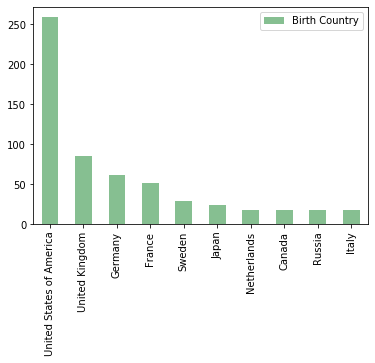

In [318]:
N.plot(kind='bar', stacked=True, color=['#86bf91'], grid=False)

### Here we can see that the USA is dominating the list of Nobel prize winners with 259 individuals who are born in the USA

### <span style="color:red"><b>So let's see the percentage of USA born winners compared to the rest of the world throughout the years</b></span>

In [319]:
clean_individuals['usa_born_winner'] = clean_individuals['Birth Country']=="United States of America"
clean_individuals['decade'] = (np.floor(clean_individuals['Year']/10)*10).astype(int)
prop_usa_winners = clean_individuals.groupby('decade',as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017857
1,1910,0.078947
2,1920,0.074074
3,1930,0.254545
4,1940,0.325000
5,1950,0.295775
6,1960,0.280000
7,1970,0.323529
8,1980,0.333333
9,1990,0.415842


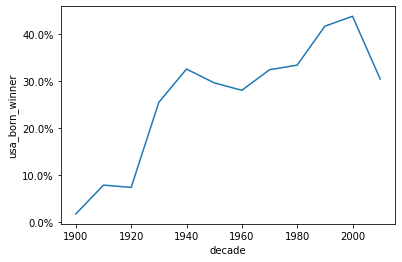

In [320]:
# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade',y='usa_born_winner')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

### As it can be seen, there's an overall increase in the dominance of USA individuals throughout decades

### <span style="color:red"><b>Let's see if it's the same for Organizations?</b></span>

In [348]:
Nobel_Org_Country_Count = clean_organizations['Organization Country'].value_counts()
Nobel_Org_Country_Count_df = pd.DataFrame(Nobel_Org_Country_Count)
M = pd.DataFrame(Nobel_Org_Country_Count_df.head(10))
M

,Organization Country
Switzerland,11
United States of America,6
United Kingdom,3
India,2
Belgium,1
Bangladesh,1
Germany,1
Tunisia,1
Austria,1
Netherlands,1


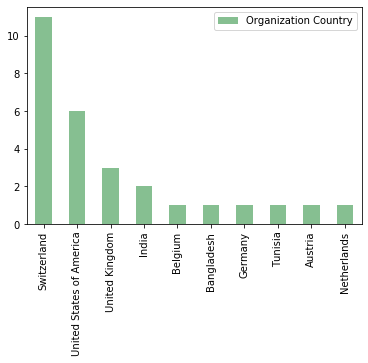

In [349]:
M.plot(kind='bar', stacked=True, color=['#86bf91'], grid=False)

### It's not the same, Switzerland have the most winning organizations 

### <span style="color:red"><b>Now let's see the number of male winners compared to number of female winners in each category</b></span>

In [329]:
Males = pd.DataFrame(clean_individuals.loc[clean_individuals['Sex'] == 'Male'])
Females = pd.DataFrame(clean_individuals.loc[clean_individuals['Sex'] == 'Female'])

In [350]:
Males['Category'].value_counts()

Physics       202
Medicine      199
Chemistry     171
Literature     99
Peace          87
Economics      77
Name: Category, dtype: int64

In [344]:
Females['Category'].value_counts()

Peace         15
Literature    14
Medicine      12
Chemistry      4
Physics        2
Economics      1
Name: Category, dtype: int64

### As it can be seen there's a clear male dominance in all categories

### <span style="color:red"><b>Who is the first female to ever win the prize? And in which category?</b></span>

In [290]:
clean_individuals[clean_individuals['Sex'] == 'Female'].nsmallest(1,'Year',keep='first')

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
19,19.0,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,1934-07-04,Sallanches,France


### <span style="color:red"><b>Female winners over decades</b></span>

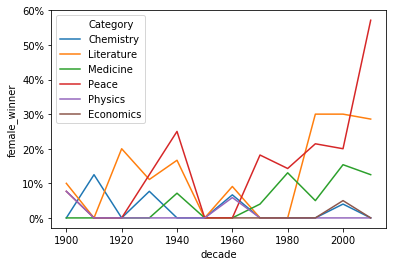

In [322]:
clean_individuals['female_winner'] = np.where(clean_individuals['Sex']=="Female", True, False)
clean_individuals['decade'] = (np.floor(clean_individuals['Year']/10)*10).astype(int)

prop_female_winners = clean_individuals.groupby(['decade','Category'],as_index=False)['female_winner'].mean()


ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

### <span style="color:red"><b> Male winners over decades</b></span>

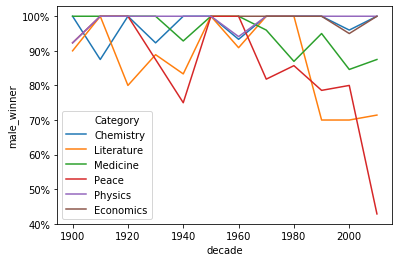

In [354]:
clean_individuals['male_winner'] = np.where(clean_individuals['Sex']=="Male", True, False)

prop_female_winners = clean_individuals.groupby(['decade','Category'],as_index=False)['male_winner'].mean()


ax = sns.lineplot(x='decade', y='male_winner', hue='Category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

### <span style="color:red"><b>Who won the prize multiple times?</b></span>

In [291]:
clean_individuals.groupby("Full Name").filter(lambda x: len(x) >= 2)['Full Name'].value_counts()

Linus Carl Pauling             2
Marie Curie, née Sklodowska    2
John Bardeen                   2
Frederick Sanger               2
Name: Full Name, dtype: int64

In [293]:
clean_organizations.groupby("Organization Name").filter(lambda x: len(x) >= 2)['Organization Name'].value_counts()

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: Organization Name, dtype: int64

### As it can be seen, only International Committee of the Red Cross have managed to win the Nobel Peace Prize 3 times in 1917, 1944 and 1963

### <span style="color:red"><b>Did any of them manage to win it across different categories?</b></span>

In [296]:
diff_categ=clean_individuals.loc[clean_individuals['Full Name'].isin(['Linus Carl Pauling'])]
diff_categ

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
271,289.0,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,1994-08-19,"Big Sur, CA",United States of America
332,357.0,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,1994-08-19,"Big Sur, CA",United States of America


diff_categ2=clean_individuals.loc[clean_individuals['Full Name'].isin(['Marie Curie, née Sklodowska'])]
diff_categ2

In [298]:
diff_categ3=clean_individuals.loc[clean_individuals['Full Name'].isin(['John Bardeen'])]
diff_categ3



,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
290,312.0,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,1991-01-30,"Boston, MA",United States of America
412,441.0,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,1991-01-30,"Boston, MA",United States of America


In [299]:
diff_categ4=clean_individuals.loc[clean_individuals['Full Name'].isin(['Frederick Sanger'])]
diff_categ4



,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Death Date,Death City,Death Country
298,320.0,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,2013-11-19,Cambridge,United Kingdom
491,525.0,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,2013-11-19,Cambridge,United Kingdom


In [301]:
diff_categ5=clean_organizations.loc[clean_organizations['Organization Name'].isin(['Comité international de la Croix Rouge (International Committee of the Red Cross)'])]
diff_categ5



,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Organization Name,Organization City,Organization Country
2,90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland
4,222,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland
8,365,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,Geneva,Switzerland


In [302]:
diff_categ6=clean_organizations.loc[clean_organizations['Organization Name'].isin(['Office of the United Nations High Commissioner for Refugees (UNHCR)'])]
diff_categ6

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Organization Name,Organization City,Organization Country
7,295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,Geneva,Switzerland
14,543,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,Geneva,Switzerland


### As it can be seen, the only ones who earned this honour were, Linus Carl Pauling, who won the Noble Prize in Chemistry in 1954 and the Nobel Peace Prize in 1962, and  Marie Curie, née Sklodowska, who won the Noble prize in Physics in 1903 and the Noble Prize in Chemistry in 1911

### Also Marie Curie, née Sklodowska happens to be the only woman to win a Nobel more than once.

### <span style="color:red"><b>At what age do people manage to win a Noble prize over the years?</b></span>

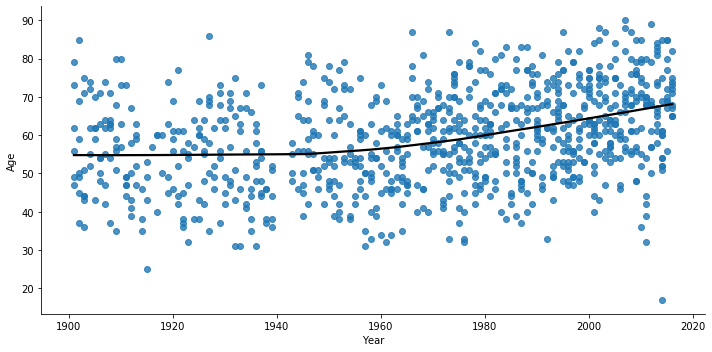

In [306]:
# Converting birth_date from String to datetime
clean_individuals['Birth Date'] = pd.to_datetime(clean_individuals["Birth Date"],errors='coerce')
# Calculating the age of Nobel Prize winners
clean_individuals['Age'] = clean_individuals['Year'] - clean_individuals['Birth Date'].dt.year

# Plotting the age of Nobel Prize winners

sns.lmplot(x='Year',y='Age',data=clean_individuals, lowess=True, aspect=2, line_kws={"color" : "black"})

### As it can be seen,  the average age at which people tend to win a Noble prize was pretty much the same since the start of the prize till late 1950's in which the average age started to rise from middle 50's up till reached nearly 70 years old in 2016

## <span style="color:red"><b>Let's now see this trend over different categories:</b></span>

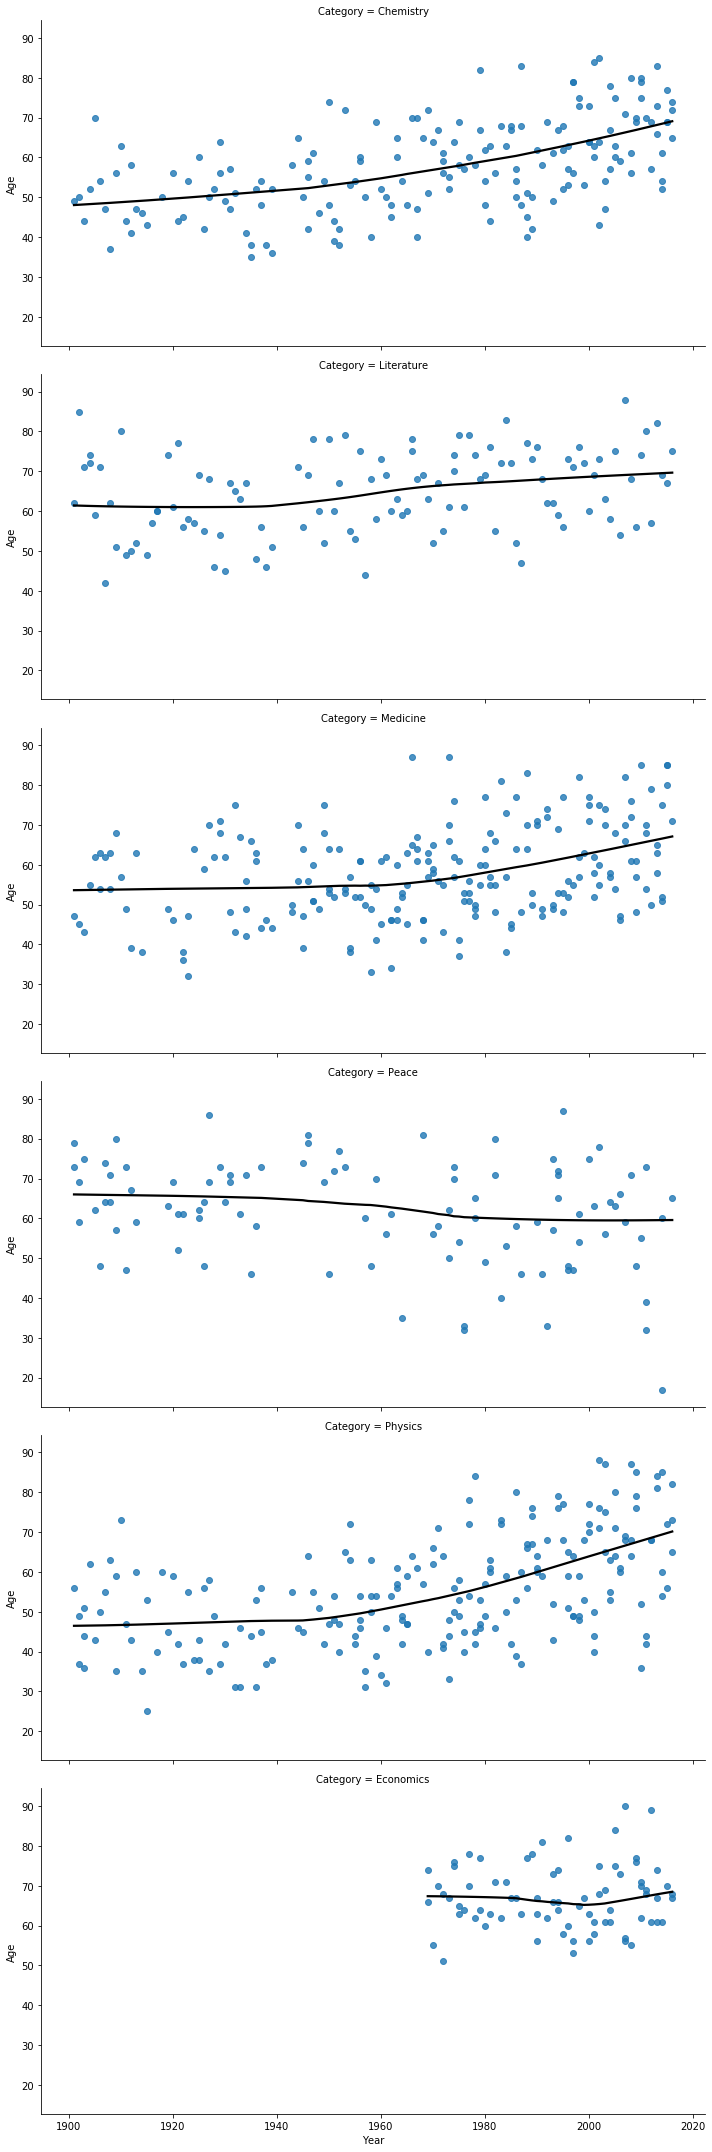

In [309]:
sns.lmplot(x='Year',y='Age',data=clean_individuals, lowess=True, aspect=2, line_kws={"color" : "black"},row='Category')

###  For chemistry, as years pass, the age of winners increase

### As for Literature, there is a slight increase in age

### In Medicine, the age almost didn't differ till 1960's, then it started increasing

### In Peace, there is an overall decrease in the age

### As for Physics, the age almost didn't differ till almost 1950's, then it started increasing

### In the Economics Prize, which only started in 1968, the age didn't differ much, it has always been arrounf the age of 70

## <span style="color:red"><b>Who is oldest and youngest winner?</b></span>

In [353]:
display(clean_individuals.nlargest(1, "Age"))

clean_individuals.nsmallest(1, "Age")

,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,...,Birth Country,Sex,Death Date,Death City,Death Country,Age,female_winner,decade,usa_born_winner,male_winner
769,825.0,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,...,Russia,Male,2008-06-24,"Minneapolis, MN",United States of America,90.0,False,2000,False,True


,Unnamed: 0,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,...,Birth Country,Sex,Death Date,Death City,Death Country,Age,female_winner,decade,usa_born_winner,male_winner
858,940.0,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,...,Pakistan,Female,NaN,NaN,NaN,17.0,True,2010,False,False


### Leonid Hurwicz is oldest who won it at the age of 90,  while Malala Yousafzai is the youngest and won it at the age of 17.